In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
import h5py
import kerastuner as kt

Using TensorFlow backend.


In [2]:
# (img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()
# 
# 
# N_channels = 40
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/gnpy_simulated_results.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[:, 0:43]
Y = dataset[:, 43:51]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y)
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
# X_train, X_val, Y_train, Y_val = train_test_split(X_scale, Y_scale, test_size=0.2)

In [3]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=43))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
#     hp_units1 = hp.Int('units1', min_value=10, max_value=300, step=2)
#     hp_units2 = hp.Int('units2', min_value=10, max_value=300, step=2)
#     model.add(keras.layers.Dense(units=hp_units1, activation='relu'))
#     model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
#     model.add(keras.layers.Dense(N_channels, activation='sigmoid'))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(keras.layers.Dense(hp.Int(f'conv_{i}_units', min_value=32, max_value=320, step=1)))
    model.add(keras.layers.Dense(8, activation='sigmoid'))
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(), metrics=['mean_squared_error'])

    return model

In [4]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('mean_squared_error', 'min'),
                     max_epochs=10,
                     factor=3,
                     directory='/Users/jackkelly/Desktop/Building_Model/',
                     project_name='intro_to_kt_layers',
                     overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [5]:
tuner.search(X_scale, Y_scale, epochs=50, validation_split=0.25, callbacks=[stop_early], verbose=2)

Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 3.6404e-04 - val_mean_squared_error: 3.6404e-04
Epoch 2/2
6749/6749 - 1s - loss: 1.8972e-04 - mean_squared_error: 1.8972e-04 - val_loss: 8.8719e-05 - val_mean_squared_error: 8.8719e-05


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 1s - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 2/2
6749/6749 - 1s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0239 - val_mean_squared_error: 0.0239


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 1s - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2/2
6749/6749 - 1s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 2/2
6749/6749 - 1s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 1s - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 2.5687e-04 - val_mean_squared_error: 2.5687e-04
Epoch 2/2
6749/6749 - 1s - loss: 1.3225e-04 - mean_squared_error: 1.3225e-04 - val_loss: 6.8945e-05 - val_mean_squared_error: 6.8945e-05


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 1s - loss: 0.1792 - mean_squared_error: 0.1792 - val_loss: 0.1631 - val_mean_squared_error: 0.1631
Epoch 2/2
6749/6749 - 0s - loss: 0.1511 - mean_squared_error: 0.1511 - val_loss: 0.1401 - val_mean_squared_error: 0.1401


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 1.1252e-04 - val_mean_squared_error: 1.1252e-04
Epoch 2/2
6749/6749 - 1s - loss: 7.0621e-05 - mean_squared_error: 7.0621e-05 - val_loss: 6.1613e-05 - val_mean_squared_error: 6.1613e-05


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 2/2
6749/6749 - 1s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 1s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 9.5742e-05 - val_mean_squared_error: 9.5742e-05
Epoch 2/2
6749/6749 - 1s - loss: 4.7382e-04 - mean_squared_error: 4.7382e-04 - val_loss: 9.2923e-04 - val_mean_squared_error: 9.2923e-04


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 1.8867e-04 - val_mean_squared_error: 1.8867e-04
Epoch 2/2
6749/6749 - 1s - loss: 9.4478e-05 - mean_squared_error: 9.4478e-05 - val_loss: 6.1948e-05 - val_mean_squared_error: 6.1948e-05


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.3879 - mean_squared_error: 0.3879 - val_loss: 0.3926 - val_mean_squared_error: 0.3926
Epoch 2/2
6749/6749 - 1s - loss: 0.3908 - mean_squared_error: 0.3908 - val_loss: 0.3926 - val_mean_squared_error: 0.3926


Train on 6749 samples, validate on 2250 samples
Epoch 1/2
6749/6749 - 2s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 2/2
6749/6749 - 1s - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Train on 6749 samples, validate on 2250 samples
Epoch 3/4
6749/6749 - 2s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 2.3934e-04 - val_mean_squared_error: 2.3934e-04
Epoch 4/4
6749/6749 - 1s - loss: 1.1621e-04 - mean_squared_error: 1.1621e-04 - val_loss: 6.1059e-05 - val_mean_squared_error: 6.1059e-05


Train on 6749 samples, validate on 2250 samples
Epoch 3/4
6749/6749 - 2s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 1.3987e-04 - val_mean_squared_error: 1.3987e-04
Epoch 4/4
6749/6749 - 1s - loss: 8.4413e-05 - mean_squared_error: 8.4413e-05 - val_loss: 5.5414e-05 - val_mean_squared_error: 5.5414e-05


Train on 6749 samples, validate on 2250 samples
Epoch 3/4
6749/6749 - 2s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 1.9182e-04 - val_mean_squared_error: 1.9182e-04
Epoch 4/4
6749/6749 - 1s - loss: 1.0474e-04 - mean_squared_error: 1.0474e-04 - val_loss: 6.0277e-05 - val_mean_squared_error: 6.0277e-05


Train on 6749 samples, validate on 2250 samples
Epoch 3/4
6749/6749 - 2s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 4.0776e-04 - val_mean_squared_error: 4.0776e-04
Epoch 4/4
6749/6749 - 1s - loss: 2.3124e-04 - mean_squared_error: 2.3124e-04 - val_loss: 1.1350e-04 - val_mean_squared_error: 1.1350e-04


Train on 6749 samples, validate on 2250 samples
Epoch 5/10
6749/6749 - 2s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 1.1959e-04 - val_mean_squared_error: 1.1959e-04
Epoch 6/10
6749/6749 - 1s - loss: 7.0683e-05 - mean_squared_error: 7.0683e-05 - val_loss: 6.6121e-05 - val_mean_squared_error: 6.6121e-05
Epoch 7/10
6749/6749 - 1s - loss: 6.5531e-05 - mean_squared_error: 6.5531e-05 - val_loss: 7.5752e-05 - val_mean_squared_error: 7.5752e-05
Epoch 8/10
6749/6749 - 1s - loss: 7.8540e-05 - mean_squared_error: 7.8540e-05 - val_loss: 8.0190e-05 - val_mean_squared_error: 8.0190e-05
Epoch 9/10
6749/6749 - 1s - loss: 9.8954e-05 - mean_squared_error: 9.8954e-05 - val_loss: 1.1302e-04 - val_mean_squared_error: 1.1302e-04
Epoch 10/10
6749/6749 - 1s - loss: 1.8285e-04 - mean_squared_error: 1.8285e-04 - val_loss: 2.1910e-04 - val_mean_squared_error: 2.1910e-04


Train on 6749 samples, validate on 2250 samples
Epoch 5/10
6749/6749 - 2s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 2.0330e-04 - val_mean_squared_error: 2.0330e-04
Epoch 6/10
6749/6749 - 1s - loss: 1.1569e-04 - mean_squared_error: 1.1569e-04 - val_loss: 6.0587e-05 - val_mean_squared_error: 6.0587e-05
Epoch 7/10
6749/6749 - 1s - loss: 5.2396e-05 - mean_squared_error: 5.2396e-05 - val_loss: 4.6885e-05 - val_mean_squared_error: 4.6885e-05
Epoch 8/10
6749/6749 - 1s - loss: 4.3342e-05 - mean_squared_error: 4.3342e-05 - val_loss: 3.3482e-05 - val_mean_squared_error: 3.3482e-05
Epoch 9/10
6749/6749 - 1s - loss: 4.2453e-05 - mean_squared_error: 4.2453e-05 - val_loss: 4.5200e-05 - val_mean_squared_error: 4.5200e-05
Epoch 10/10
6749/6749 - 1s - loss: 7.0017e-05 - mean_squared_error: 7.0017e-05 - val_loss: 6.0357e-05 - val_mean_squared_error: 6.0357e-05


Train on 6749 samples, validate on 2250 samples
Epoch 1/4
6749/6749 - 2s - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 2/4
6749/6749 - 1s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 3/4
6749/6749 - 1s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/4
6749/6749 - 1s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Train on 6749 samples, validate on 2250 samples
Epoch 1/4
6749/6749 - 2s - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.3288 - val_mean_squared_error: 0.3288
Epoch 2/4
6749/6749 - 1s - loss: 0.4094 - mean_squared_error: 0.4094 - val_loss: 0.4199 - val_mean_squared_error: 0.4199
Epoch 3/4
6749/6749 - 1s - loss: 0.4261 - mean_squared_error: 0.4261 - val_loss: 0.4199 - val_mean_squared_error: 0.4199
Epoch 4/4
6749/6749 - 1s - loss: 0.4261 - mean_squared_error: 0.4261 - val_loss: 0.4199 - val_mean_squared_error: 0.4199


Train on 6749 samples, validate on 2250 samples
Epoch 1/4
6749/6749 - 1s - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 2/4
6749/6749 - 1s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3/4
6749/6749 - 1s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/4
6749/6749 - 1s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 9.8940e-04 - val_mean_squared_error: 9.8940e-04


Train on 6749 samples, validate on 2250 samples
Epoch 1/4
6749/6749 - 2s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 4.8618e-04 - val_mean_squared_error: 4.8618e-04
Epoch 2/4
6749/6749 - 1s - loss: 2.4515e-04 - mean_squared_error: 2.4515e-04 - val_loss: 1.2809e-04 - val_mean_squared_error: 1.2809e-04
Epoch 3/4
6749/6749 - 1s - loss: 8.2594e-05 - mean_squared_error: 8.2594e-05 - val_loss: 5.7037e-05 - val_mean_squared_error: 5.7037e-05
Epoch 4/4
6749/6749 - 1s - loss: 5.2808e-05 - mean_squared_error: 5.2808e-05 - val_loss: 5.5499e-05 - val_mean_squared_error: 5.5499e-05


Train on 6749 samples, validate on 2250 samples
Epoch 1/4
6749/6749 - 2s - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 2/4
6749/6749 - 1s - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 3/4
6749/6749 - 1s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/4
6749/6749 - 1s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Train on 6749 samples, validate on 2250 samples
Epoch 1/4
6749/6749 - 1s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 1.4870e-04 - val_mean_squared_error: 1.4870e-04
Epoch 2/4
6749/6749 - 1s - loss: 3.2230e-04 - mean_squared_error: 3.2230e-04 - val_loss: 6.5574e-04 - val_mean_squared_error: 6.5574e-04
Epoch 3/4
6749/6749 - 1s - loss: 3.6012e-04 - mean_squared_error: 3.6012e-04 - val_loss: 5.6498e-04 - val_mean_squared_error: 5.6498e-04
Epoch 4/4
6749/6749 - 1s - loss: 6.2262e-04 - mean_squared_error: 6.2262e-04 - val_loss: 5.6785e-04 - val_mean_squared_error: 5.6785e-04


Train on 6749 samples, validate on 2250 samples
Epoch 5/10
6749/6749 - 2s - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 3.1271e-04 - val_mean_squared_error: 3.1271e-04
Epoch 6/10
6749/6749 - 1s - loss: 1.7256e-04 - mean_squared_error: 1.7256e-04 - val_loss: 8.6356e-05 - val_mean_squared_error: 8.6356e-05
Epoch 7/10
6749/6749 - 1s - loss: 6.4512e-05 - mean_squared_error: 6.4512e-05 - val_loss: 5.0459e-05 - val_mean_squared_error: 5.0459e-05
Epoch 8/10
6749/6749 - 1s - loss: 4.4208e-05 - mean_squared_error: 4.4208e-05 - val_loss: 4.0975e-05 - val_mean_squared_error: 4.0975e-05
Epoch 9/10
6749/6749 - 1s - loss: 4.1602e-05 - mean_squared_error: 4.1602e-05 - val_loss: 2.9376e-05 - val_mean_squared_error: 2.9376e-05
Epoch 10/10
6749/6749 - 1s - loss: 3.3618e-05 - mean_squared_error: 3.3618e-05 - val_loss: 3.6960e-05 - val_mean_squared_error: 3.6960e-05


Train on 6749 samples, validate on 2250 samples
Epoch 5/10
6749/6749 - 1s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 1.1904e-04 - val_mean_squared_error: 1.1904e-04
Epoch 6/10
6749/6749 - 1s - loss: 3.9516e-04 - mean_squared_error: 3.9516e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/10
6749/6749 - 1s - loss: 3.9101e-04 - mean_squared_error: 3.9101e-04 - val_loss: 3.9445e-04 - val_mean_squared_error: 3.9445e-04
Epoch 8/10
6749/6749 - 1s - loss: 5.3218e-04 - mean_squared_error: 5.3218e-04 - val_loss: 2.7660e-04 - val_mean_squared_error: 2.7660e-04
Epoch 9/10
6749/6749 - 1s - loss: 5.9690e-04 - mean_squared_error: 5.9690e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 10/10
6749/6749 - 1s - loss: 6.2628e-04 - mean_squared_error: 6.2628e-04 - val_loss: 3.5297e-04 - val_mean_squared_error: 3.5297e-04


Train on 6749 samples, validate on 2250 samples
Epoch 1/10
6749/6749 - 1s - loss: 0.1854 - mean_squared_error: 0.1854 - val_loss: 0.1697 - val_mean_squared_error: 0.1697
Epoch 2/10
6749/6749 - 0s - loss: 0.1599 - mean_squared_error: 0.1599 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 3/10
6749/6749 - 0s - loss: 0.1418 - mean_squared_error: 0.1418 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 4/10
6749/6749 - 0s - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.1178 - val_mean_squared_error: 0.1178
Epoch 5/10
6749/6749 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 6/10
6749/6749 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0917 - val_mean_squared_error: 0.0917
Epoch 7/10
6749/6749 - 0s - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 8/10
6749/6749 - 0s - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0698 - val_mea

Train on 6749 samples, validate on 2250 samples
Epoch 1/10
6749/6749 - 1s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 1.2788e-04 - val_mean_squared_error: 1.2788e-04
Epoch 2/10
6749/6749 - 1s - loss: 2.9128e-04 - mean_squared_error: 2.9128e-04 - val_loss: 5.0060e-04 - val_mean_squared_error: 5.0060e-04
Epoch 3/10
6749/6749 - 1s - loss: 5.3801e-04 - mean_squared_error: 5.3801e-04 - val_loss: 2.0241e-04 - val_mean_squared_error: 2.0241e-04
Epoch 4/10
6749/6749 - 1s - loss: 6.6782e-04 - mean_squared_error: 6.6782e-04 - val_loss: 6.6481e-04 - val_mean_squared_error: 6.6481e-04
Epoch 5/10
6749/6749 - 1s - loss: 5.2220e-04 - mean_squared_error: 5.2220e-04 - val_loss: 2.5996e-04 - val_mean_squared_error: 2.5996e-04
Epoch 6/10
6749/6749 - 1s - loss: 4.5487e-04 - mean_squared_error: 4.5487e-04 - val_loss: 3.9938e-04 - val_mean_squared_error: 3.9938e-04


Train on 6749 samples, validate on 2250 samples
Epoch 1/10
6749/6749 - 2s - loss: 0.4257 - mean_squared_error: 0.4257 - val_loss: 0.4341 - val_mean_squared_error: 0.4341
Epoch 2/10
6749/6749 - 1s - loss: 0.4357 - mean_squared_error: 0.4357 - val_loss: 0.4341 - val_mean_squared_error: 0.4341
Epoch 3/10
6749/6749 - 1s - loss: 0.4357 - mean_squared_error: 0.4357 - val_loss: 0.4341 - val_mean_squared_error: 0.4341
Epoch 4/10
6749/6749 - 1s - loss: 0.4357 - mean_squared_error: 0.4357 - val_loss: 0.4341 - val_mean_squared_error: 0.4341
Epoch 5/10
6749/6749 - 1s - loss: 0.4357 - mean_squared_error: 0.4357 - val_loss: 0.4341 - val_mean_squared_error: 0.4341
Epoch 6/10
6749/6749 - 1s - loss: 0.4357 - mean_squared_error: 0.4357 - val_loss: 0.4341 - val_mean_squared_error: 0.4341


Train on 6749 samples, validate on 2250 samples
Epoch 1/10
6749/6749 - 2s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/10
6749/6749 - 1s - loss: 6.9205e-04 - mean_squared_error: 6.9205e-04 - val_loss: 2.9238e-04 - val_mean_squared_error: 2.9238e-04
Epoch 3/10
6749/6749 - 1s - loss: 3.3689e-04 - mean_squared_error: 3.3689e-04 - val_loss: 6.9439e-04 - val_mean_squared_error: 6.9439e-04
Epoch 4/10
6749/6749 - 1s - loss: 7.0286e-04 - mean_squared_error: 7.0286e-04 - val_loss: 6.9501e-04 - val_mean_squared_error: 6.9501e-04
Epoch 5/10
6749/6749 - 1s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/10
6749/6749 - 1s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/10
6749/6749 - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


INFO:tensorflow:Oracle triggered exit


In [6]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [7]:
# Build the model with the optimal hyperparameters and train it on the data for 25 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_scale, Y_scale, epochs=25, validation_split=0.25, verbose=0)

mean_squared_error_per_epoch = history.history['mean_squared_error']
best_epoch = mean_squared_error_per_epoch.index(min(mean_squared_error_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 5


In [8]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_scale, Y_scale, epochs=best_epoch, validation_split=0.25, verbose=0)

In [10]:
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/gnpy_simulated_results_test_2.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[:, 0:43]
Y = dataset[:, 43:51]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(X)
Y_test = min_max_scaler.fit_transform(Y)

In [11]:
eval_result = hypermodel.evaluate(X_test, Y_test)
print(eval_result)
# print("[test loss, test accuracy]:", eval_result)

892/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 38us/sample - loss: 0.0014 - mean_squared_error: 0.0015
[0.0015357359450293762, 0.001535736]


In [12]:
# for key, value in history.history.items():
#     print(key)

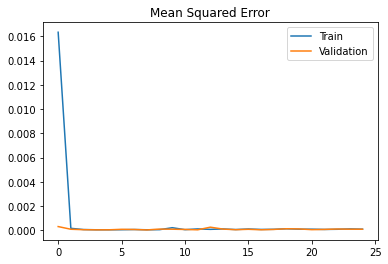

In [13]:
def visualising_data(hist):
    plt.title('Mean Squared Error')
    plt.plot(history.history['mean_squared_error'], label='Train')
    plt.plot(history.history['val_mean_squared_error'], label='Validation')
    plt.legend()
    plt.show()
visualising_data(history)

In [14]:
# shows weights of the ANN
# hypermodel.weights
hypermodel.summary()
# print(hypermodel.metrics_names)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                3872      
_________________________________________________________________
dense_1 (Dense)              (None, 235)               20915     
_________________________________________________________________
dense_2 (Dense)              (None, 59)                13924     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 480       
Total params: 39,191
Trainable params: 39,191
Non-trainable params: 0
_________________________________________________________________


In [17]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(1)[0]

In [29]:
best_hps.__dict__.keys()
best_hps.__dict__['values']

{'n_layers': 3,
 'conv_0_units': 88,
 'learning_rate': 0.001,
 'conv_1_units': 235,
 'conv_2_units': 59,
 'conv_3_units': 112,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '53c6bb3137e8517e617b786ddfa01b1a'}

In [31]:
out = hypermodel.evaluate(X_scale, Y_scale)

8999/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 41us/sample - loss: 2.5933e-05 - mean_squared_error: 3.4593e-05


In [32]:
# THIS SHOWS MY MODEL IS BETTER THAN PREVIOUS YEAR
out[0]

[3.45925844324603e-05, 3.4592576e-05]

In [33]:
# Testing against real data
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/train_test_data_real_parsed.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[:, 0:43]
Y = dataset[:, 43:51]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(X)
Y_test = min_max_scaler.fit_transform(Y)
hypermodel.evaluate(X_test, Y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 42us/sample - loss: 0.0798 - mean_squared_error: 0.0814


[0.0813803785443306, 0.08138038]